In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
boston  = pd.read_csv('./boston_data.csv')
boston_test = pd.read_csv('./boston_test_data.csv')
X = boston.drop('medv', axis=1)
y = boston.medv
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [17]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
147,0.09103,0.0,2.46,0.0,0.488,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82
283,2.31390,0.0,19.58,0.0,0.605,5.880,97.3,2.3887,5.0,403.0,14.7,348.13,12.03
76,0.03932,0.0,3.41,0.0,0.489,6.405,73.9,3.0921,2.0,270.0,17.8,393.55,8.20
363,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
156,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39
354,1.15172,0.0,8.14,0.0,0.538,5.701,95.0,3.7872,4.0,307.0,21.0,358.77,18.35
245,0.07978,40.0,6.41,0.0,0.447,6.482,32.1,4.1403,4.0,254.0,17.6,396.90,7.19
110,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74


In [16]:
from sklearn.linear_model import Ridge
for i in range(0,50,10):
    ridge = Ridge(alpha=i)
    ridge.fit(X_train, y_train)
    print(ridge.coef_)

[-1.31877126e-01  4.88058438e-02  3.51323967e-02  3.40466010e+00
 -1.35768297e+01  4.21091354e+00 -9.57174887e-03 -1.31269125e+00
  2.57344349e-01 -1.17391858e-02 -7.81903503e-01  1.07573660e-02
 -4.80627456e-01]
[-0.12579822  0.05175769 -0.0080605   1.88152411 -1.25043613  3.99487076
 -0.01836097 -1.13249436  0.24303324 -0.01325995 -0.66663227  0.01234178
 -0.52592012]
[-0.12533993  0.05448777 -0.00963373  1.34586519 -0.67409308  3.57350599
 -0.01565839 -1.13390456  0.25096114 -0.01371421 -0.68219549  0.01211331
 -0.55596427]
[-0.12494452  0.05648778 -0.01064521  1.05178007 -0.46679345  3.23039456
 -0.01316635 -1.13320872  0.25741659 -0.0140225  -0.6950942   0.01188947
 -0.57909685]
[-0.12455164  0.05799993 -0.01137352  0.86541574 -0.35855427  2.94871008
 -0.01098224 -1.12917103  0.26258464 -0.01425429 -0.70486533  0.01169559
 -0.59762834]


In [30]:
from sklearn.linear_model import Lasso
import numpy as np
ls = np.array
for i in range(0,10):
    lasso = Lasso(alpha=i)
    lasso.fit(X_train, y_train)
    ls.

In [32]:
ls = np.array()

TypeError: array() missing required argument 'object' (pos 0)

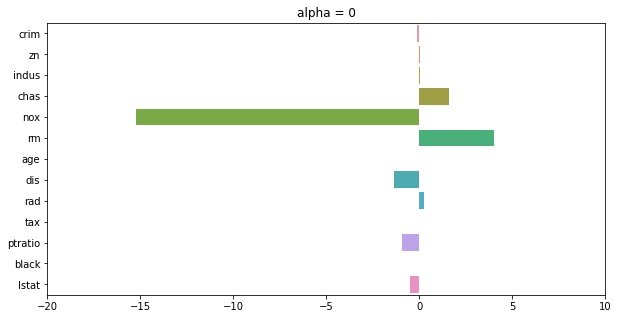

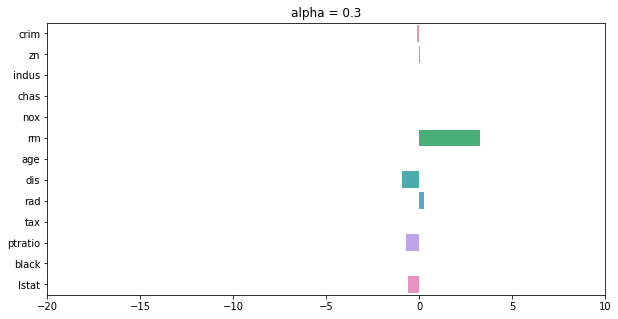

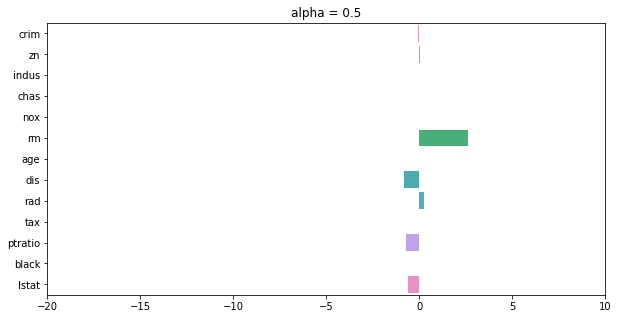

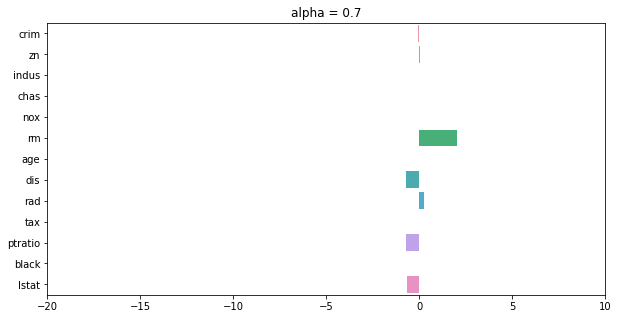

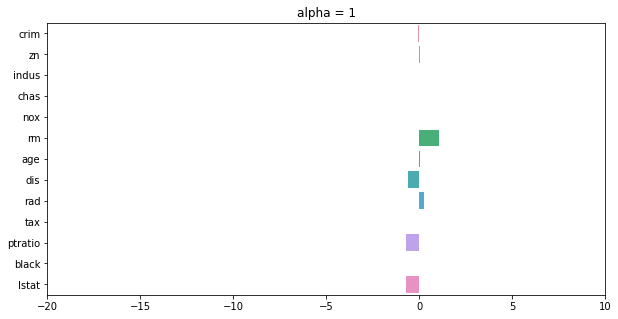

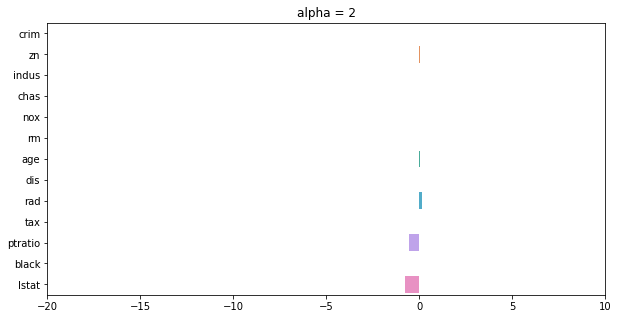

In [45]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

for i in [0, 0.3, 0.5, 0.7, 1, 2]:
    lasso= Lasso(alpha=i)
    lasso.fit(X, y)
    plt.figure(figsize=(10,5))
    plt.title(f'alpha = {i}')
    plt.xlim(-20, 10)
    sns.barplot(lasso.coef_, lasso.feature_names_in_)
    plt.show()

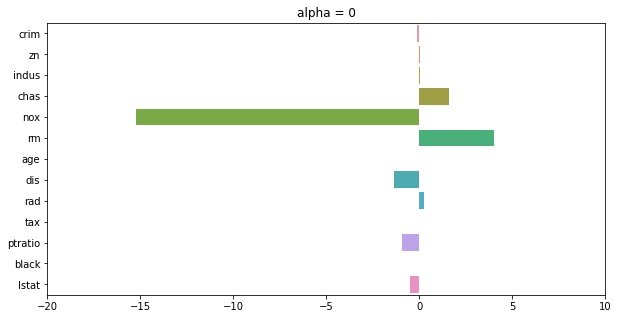

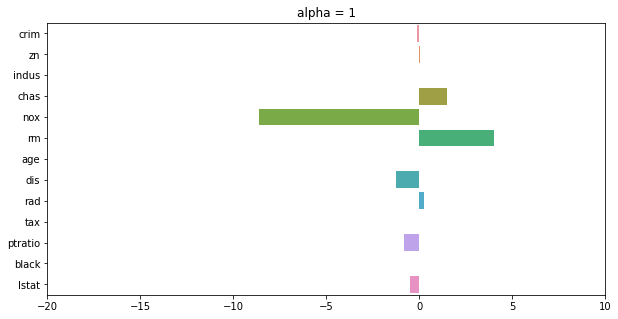

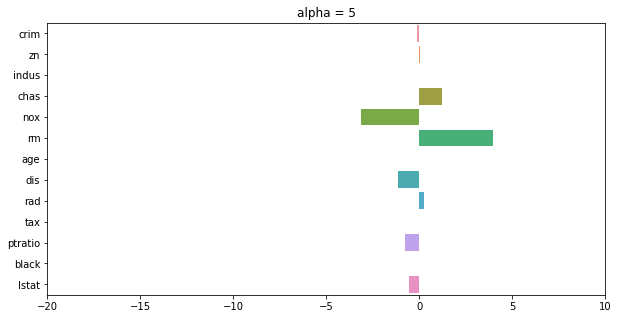

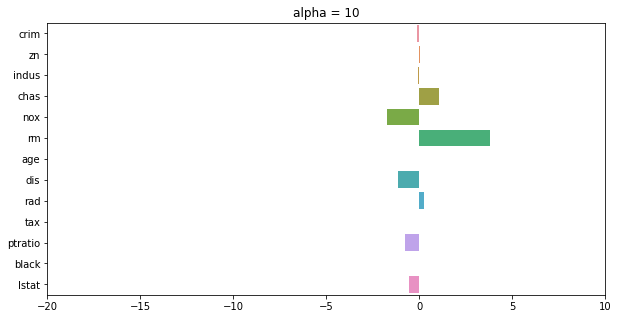

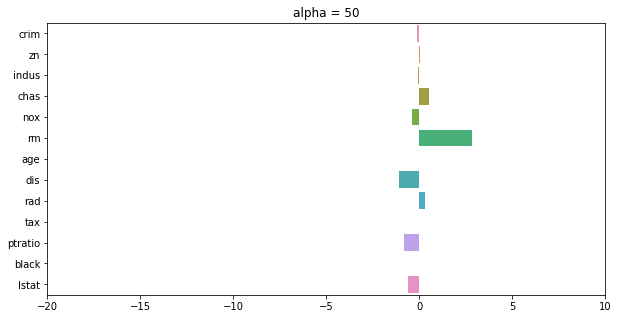

In [46]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

for i in [0, 1, 5, 10, 50]:
    ridge= Ridge(alpha=i)
    ridge.fit(X, y)
    plt.figure(figsize=(10,5))
    plt.title(f'alpha = {i}')
    plt.xlim(-20, 10)
    sns.barplot(ridge.coef_, ridge.feature_names_in_)
    plt.show()

In [21]:
lasso.feature_names_in_

array(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat'], dtype=object)

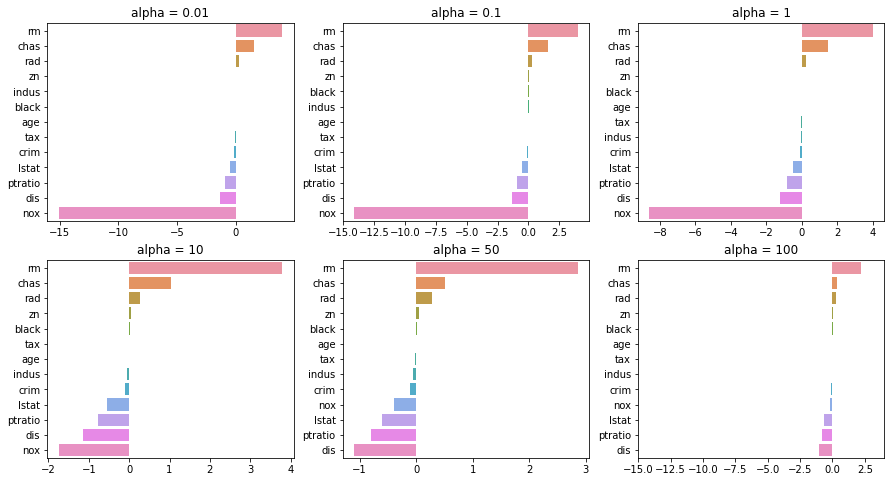

In [49]:
from sklearn.linear_model import Ridge
fig = plt.figure(figsize=(15,8))
for i in range(6):
    globals()[f'ax{i+1}'] = fig.add_subplot(2, 3, i+1)
for idx, alpha in enumerate([0.01, 0.1, 1, 10, 50, 100]):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
     # feature별 importance 매핑
    f_i1 = {}
    f_i2 = {}
    for name, value in zip(X.columns, ridge.coef_) :
        f_i1[name] = value
        result1 = sorted(f_i1.items(), key=lambda x:x[1], reverse=True)
    for i, j in result1:
        f_i2[i] = j
    sns.barplot(x=list(f_i2.values()), y=list(f_i2.keys()), ax=globals()[f'ax{idx+1}'])
    globals()[f'ax{idx+1}'].set_title(f'alpha = {alpha}')
    plt.xlim(-15, 4)
plt.show()

In [50]:
pip install tensorflow

     |████████████████████████████████| 241.2 MB 65 kB/s s eta 0:00:011
     |████████████████████████████████| 13.2 MB 29.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 41.8 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 5.6 MB/s eta 0:00:0101
     |████████████████████████████████| 124 kB 89.5 MB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 45.5 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 9.6 MB/s s eta 0:00:01
     |████████████████████████████████| 57 kB 35.7 MB/s  eta 0:00:01
     |████████████████████████████████| 1.7 MB 50.2 MB/s eta 0:00:01
     |████████████████████████████████| 438 kB 32.5 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 24.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 31.5 MB/s eta 0:00:01
     |████████████████████████████████| 151 kB 45.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
